In [3]:
import pandas as pd

stroke_test = pd.read_csv('StrokeFold/stroke_fold_1.csv')

non_stroke_test = pd.read_csv('NonStrokeFold/no_stroke_fold_1.csv').sample(n=100, random_state=1)
non_stroke_train = non_stroke_test.drop(non_stroke_test.index)
stroke_folds = [pd.read_csv(f'StrokeFold/stroke_fold_{i}.csv') for i in range(2, 6)]
non_stroke_folds = [pd.read_csv(f'NonStrokeFold/no_stroke_fold_{i}.csv').sample(n=100, random_state=1) for i in range(2, 6)]

df_training = pd.concat([non_stroke_train] + non_stroke_folds + stroke_folds)
df_testing = pd.concat([stroke_test, non_stroke_test])


Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       100
         1.0       0.62      0.52      0.57        50

    accuracy                           0.73       150
   macro avg       0.70      0.68      0.69       150
weighted avg       0.72      0.73      0.73       150

Confusion Matrix:


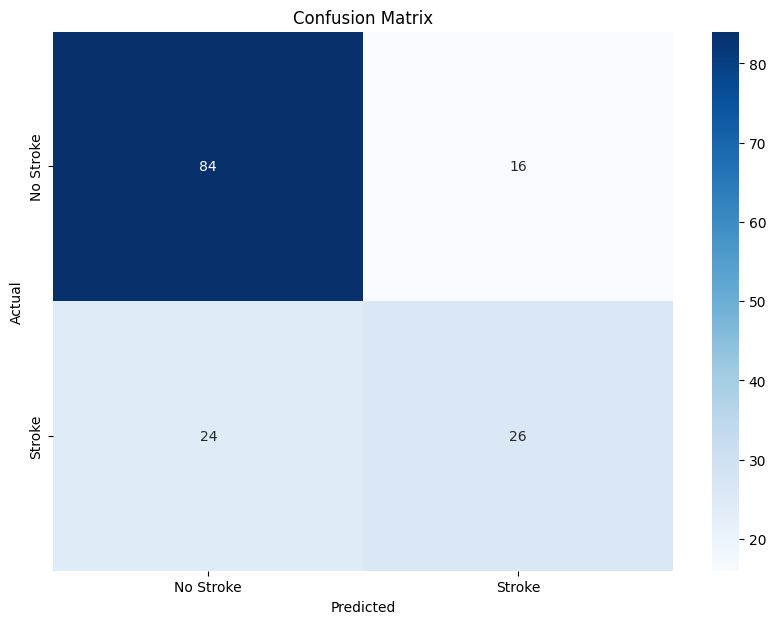

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Split the data into features and target
X_train = df_training.drop('stroke', axis=1)
y_train = df_training['stroke']
X_test = df_testing.drop('stroke', axis=1)
y_test = df_testing['stroke']

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
import matplotlib.pyplot as plt

# Plot confusion matrix using seaborn heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       100
         1.0       0.68      0.54      0.60        50

    accuracy                           0.76       150
   macro avg       0.73      0.71      0.71       150
weighted avg       0.75      0.76      0.75       150

Confusion Matrix for SVM:


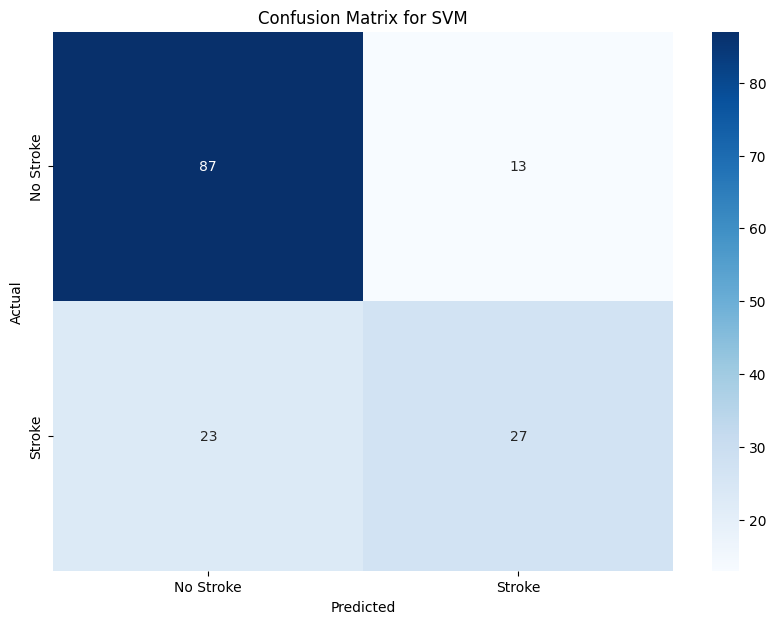

In [8]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(random_state=42, kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix for SVM:")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       100
         1.0       0.67      0.52      0.58        50

    accuracy                           0.75       150
   macro avg       0.73      0.70      0.70       150
weighted avg       0.74      0.75      0.74       150

Confusion Matrix for Logistic Regression:


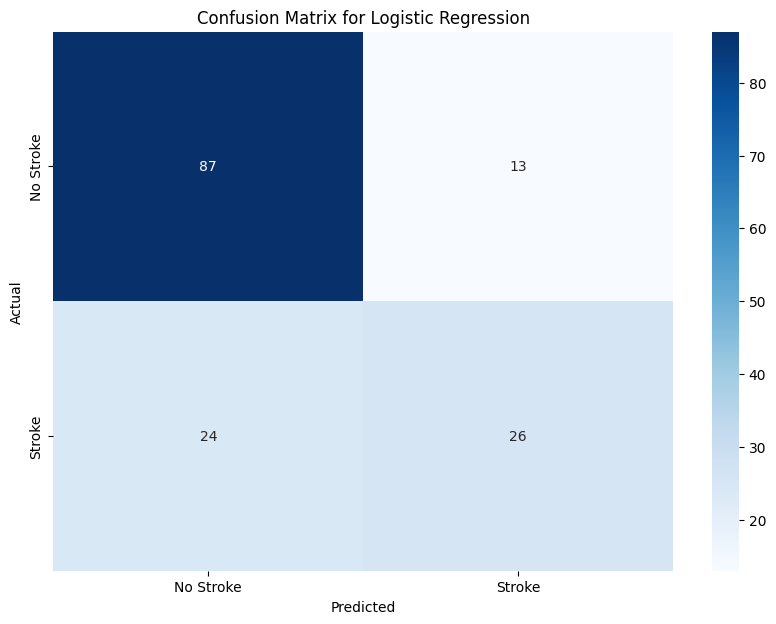

In [9]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix for Logistic Regression:")
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()